## IMPORT LIBRARY


In [308]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#202331319_Muhammad Rizki Insani

## MEMBACA GAMBAR

In [333]:
img = cv2.imread('RGB_Nama.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#202331319_Muhammad Rizki Insani

## WARNA MERAH

In [336]:
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red = cv2.bitwise_or(cv2.inRange(hsv_image, lower_red1, upper_red1),
                          cv2.inRange(hsv_image, lower_red2, upper_red2))
#202331319_Muhammad Rizki Insani

## WARNA HIJAU

In [339]:
lower_green = np.array([40, 100, 40])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
#202331319_Muhammad Rizki Insani

## WARNA BIRU

In [342]:
lower_blue = np.array([100, 100, 45])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)
#202331319_Muhammad Rizki Insani

In [344]:
# Fungsi perbaikan dengan deteksi latar putih menggunakan threshold
def highlight_non_color_text(mask_color):
    result = np.ones_like(img_rgb) * 255  # background putih
    
    # Deteksi background putih "cukup terang" (bukan teks)
    white_bg_mask = np.all(img_rgb >= [180, 180, 180], axis=-1)
    
    # Teks non-target adalah piksel yang:
    # - Tidak terdeteksi warna target (mask_color == 0)
    # - Bukan background putih
    text_mask = np.logical_and(mask_color == 0, ~white_bg_mask)
    
    # Buat teks jadi hitam
    result[text_mask] = [0, 0, 0]
    
    return result
    #202331319_Muhammad Rizki Insani

## GAMBAR HASIL

In [347]:
highlight_blue = highlight_non_color_text(mask_blue)
highlight_red = highlight_non_color_text(mask_red)
highlight_green = highlight_non_color_text(mask_green)
#202331319_Muhammad Rizki Insani

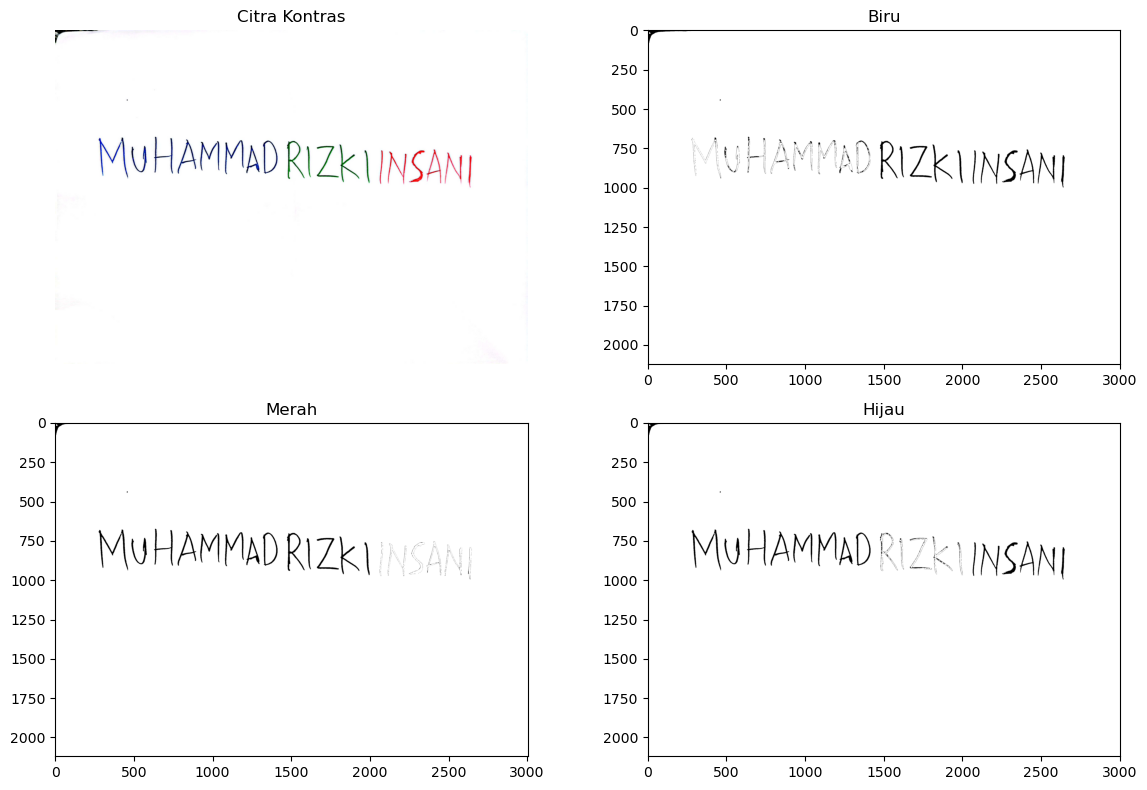

In [348]:
# Tampilkan hasil dalam layout 2x2
plt.figure(figsize=(12, 8))

#Citra Asli
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Kontras')
plt.axis('off')

#Biru
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(highlight_blue, cv2.COLOR_BGR2RGB))
plt.title('Biru')
plt.axis('on')

#Merah
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(highlight_red, cv2.COLOR_BGR2RGB))
plt.title('Merah')
plt.axis('on')

#Hijau
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(highlight_green, cv2.COLOR_BGR2RGB))
plt.title('Hijau')
plt.axis('on')

plt.tight_layout()
plt.show()
#202331319_Muhammad Rizki Insani

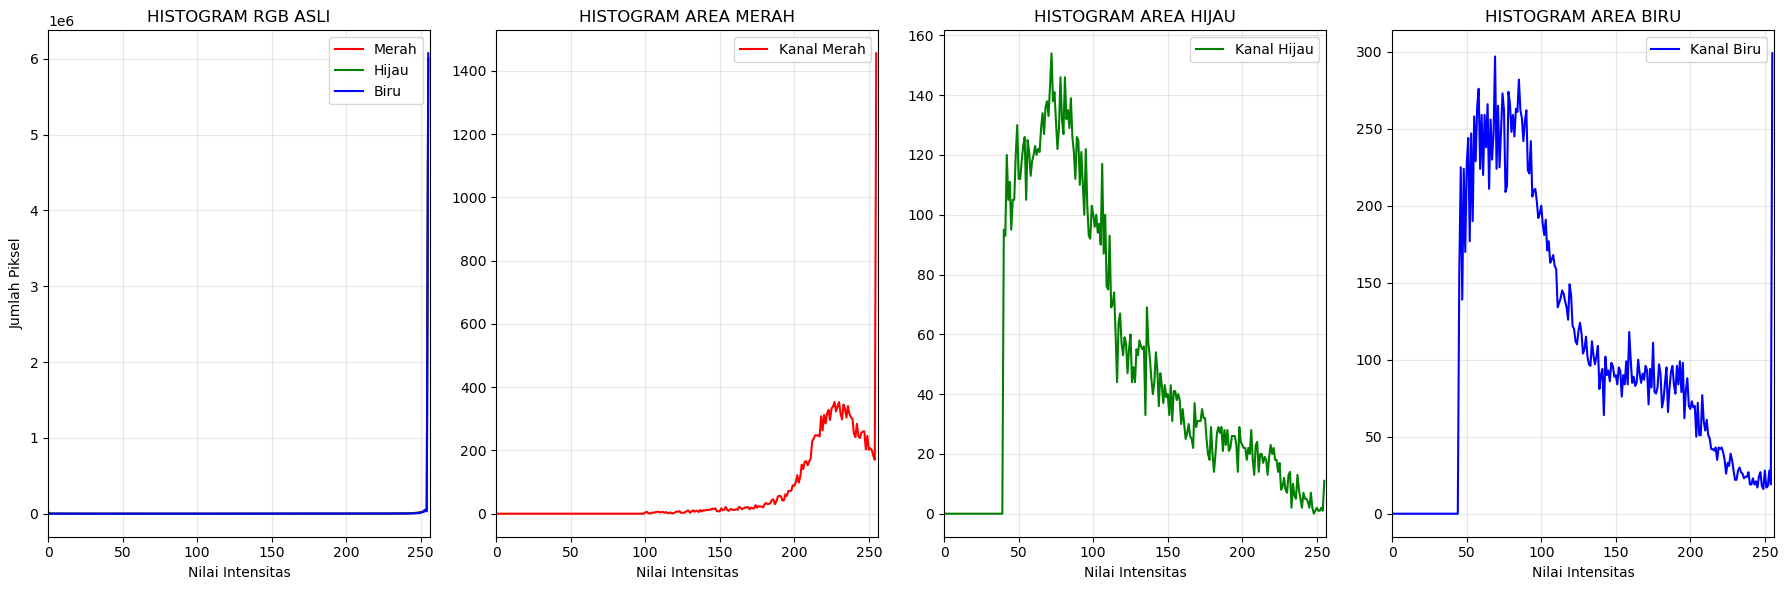

In [331]:
plt.figure(figsize=(18, 6))

# Histogram citra asli (RGB)
plt.subplot(1, 4, 1)
color = ('r', 'g', 'b')
labels = ('Merah', 'Hijau', 'Biru')
for i, (col, label) in enumerate(zip(color, labels)):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=label)
plt.title("HISTOGRAM RGB ASLI")
plt.xlabel('Nilai Intensitas')
plt.ylabel('Jumlah Piksel')
plt.xlim([0, 256])
plt.legend()
plt.grid(True, alpha=0.3)

# Histogram area merah
plt.subplot(1, 4, 2)
hist_red = cv2.calcHist([img_rgb], [0], mask_red, [256], [0, 256])
plt.plot(hist_red, color='r', label='Kanal Merah')
plt.title("HISTOGRAM AREA MERAH")
plt.xlabel('Nilai Intensitas')
plt.xlim([0, 256])
plt.legend()
plt.grid(True, alpha=0.3)

# Histogram area hijau
plt.subplot(1, 4, 3)
hist_green = cv2.calcHist([img_rgb], [1], mask_green, [256], [0, 256])
plt.plot(hist_green, color='g', label='Kanal Hijau')
plt.title("HISTOGRAM AREA HIJAU")
plt.xlabel('Nilai Intensitas')
plt.xlim([0, 256])
plt.legend()
plt.grid(True, alpha=0.3)

# Histogram area biru
plt.subplot(1, 4, 4)
hist_blue = cv2.calcHist([img_rgb], [2], mask_blue, [256], [0, 256])
plt.plot(hist_blue, color='b', label='Kanal Biru')
plt.title("HISTOGRAM AREA BIRU")
plt.xlabel('Nilai Intensitas')
plt.xlim([0, 256])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
#202331319_Muhammad Rizki Insani